# Neural Network

## 1. Basic Usage of TensofFlow
- References
  - https://www.tensorflow.org/versions/r0.11/get_started/basic_usage.html
  - https://www.tensorflow.org/versions/r0.11/resources/dims_types.html
- **TensorFlow** is a programming system in which you represent computations as graphs. 
- Nodes in the graph are called **operations**. 
  - An operation takes zero or more Tensors, performs some computation, and produces zero or more Tensors. 
- A **Tensor** is a typed multi-dimensional array. 

In [1]:
import tensorflow as tf

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
print "matrix1 -", matrix1
print "matrix2 -", matrix2
print

matrix3 = tf.matmul(matrix1, matrix2)
print "matrix3 -", matrix3
matrix4 = tf.matmul(matrix2, matrix1)
print "matrix4 -", matrix4
print

matrix5 = tf.constant([[1., 1.], [2., 2.]])
print "matrix5 -", matrix5
matrix6 = tf.constant([10., 100.])
print "matrix6 -", matrix6
print



matrix7 = matrix5 + matrix6
print "matrix7 -", matrix7
matrix8 = matrix5 * matrix6
print "matrix8 -", matrix8

matrix8 = tf.constant([[1., 1.], [2., 2.]])
print "matrix8 -", matrix8
matrix9 = tf.ones([2])
print "matrix9 -", matrix9

matrix10 = matrix8 + matrix9  #broadcast
print "matrix10 -", matrix10

print 

sess = tf.Session()
matrix3_result = sess.run(matrix3)
print "matrix3_result -\n", matrix3_result

matrix4_result = sess.run(matrix4)
print "matrix4_result -\n", matrix4_result

matrix7_result = sess.run(matrix7)
print "matrix7_result -\n", matrix7_result

matrix10_result = sess.run(matrix10)
print "matrix10_result -\n", matrix10_result

matrix1 - Tensor("Const:0", shape=(1, 2), dtype=float32)
matrix2 - Tensor("Const_1:0", shape=(2, 1), dtype=float32)

matrix3 - Tensor("MatMul:0", shape=(1, 1), dtype=float32)
matrix4 - Tensor("MatMul_1:0", shape=(2, 2), dtype=float32)

matrix5 - Tensor("Const_2:0", shape=(2, 2), dtype=float32)
matrix6 - Tensor("Const_3:0", shape=(2,), dtype=float32)

matrix7 - Tensor("add:0", shape=(2, 2), dtype=float32)
matrix8 - Tensor("mul:0", shape=(2, 2), dtype=float32)
matrix8 - Tensor("Const_4:0", shape=(2, 2), dtype=float32)
matrix9 - Tensor("ones:0", shape=(2,), dtype=float32)
matrix10 - Tensor("add_1:0", shape=(2, 2), dtype=float32)

matrix3_result -
[[ 12.]]
matrix4_result -
[[ 6.  6.]
 [ 6.  6.]]
matrix7_result -
[[  11.  101.]
 [  12.  102.]]
matrix10_result -
[[ 2.  2.]
 [ 3.  3.]]


## 2. MNIST handwritten digits image set
- Note1: http://yann.lecun.com/exdb/mnist/
- Note2: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


- Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:
<img src="https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png" width="50%" />

- flatten 1-D tensor of size 28x28 = 784.
  - Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.
$$[0, 0, 0, ..., 0.6, 0.7, 0.7, 0.5, ... 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.3, ..., 0.4, 0.4, 0.4, ... 0, 0, 0]$$ 

In [3]:
print type(mnist.train.images), mnist.train.images.shape
print type(mnist.train.labels), mnist.train.labels.shape

<type 'numpy.ndarray'> (55000, 784)
<type 'numpy.ndarray'> (55000, 10)


- Number of train images is 55000.
- **mnist.train.images** is a tensor with a shape of [55000, 784]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-xs.png" width="50%" />

- A one-hot vector is a vector which is 0 in most entries, and 1 in a single entry.
- In this case, the $n$th digit will be represented as a vector which is 1 in the nth entry. 
  - For example, 3 would be $[0,0,0,1,0,0,0,0,0,0]$. 
- **mnist.train.labels** is a tensor with a shape of [55000, 10]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-ys.png" width="48%" />

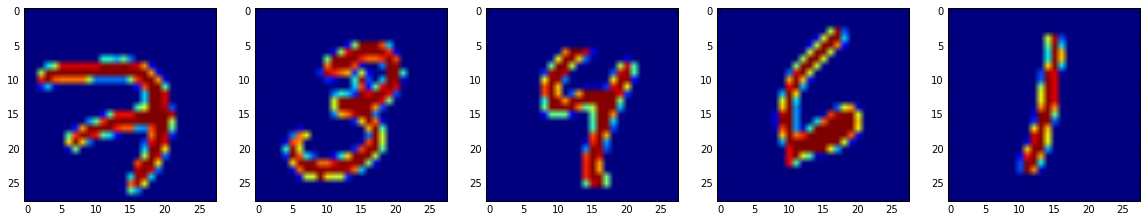

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = np.array(mnist.train.images[i])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

## 3. Neural Network Model

- Input Layer to Output Layer
 - $i=1...784$
 - $j=1...10$
$$ u_j = \sum_i W_{ji} x_i + b_j $$

- Presentation of Matrix and Vector
  - Shape of ${\bf W} = 10 \times 784$
  - Shape of ${\bf x} = 784 \times 1$
  - Shape of ${\bf b} = 10 \times 1$
  - Shape of ${\bf u} = 10 \times 1$
$$ {\bf u} = {\bf Wx + b} $$

In [5]:
batch_images, batch_labels = mnist.train.next_batch(1)
print batch_images.shape
print batch_images
print

print batch_labels.shape
print batch_labels

(1, 784)
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.  

-  Transposed Matrix Operation in Tensorflow
  - Shape of ${\bf x} = 1 \times 784$
  - Shape of ${\bf W} = 784 \times 10$
  - Shape of ${\bf b} = 1 \times 10$
  - Shape of ${\bf u} = 1 \times 10$
$$ {\bf u} = {\bf xW + b} $$ 

In [6]:
batch_images, batch_labels = mnist.train.next_batch(100)
print batch_images.shape
print batch_images
print

print batch_labels.shape
print batch_labels

(100, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

(100, 10)
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1

- Mini Batch (ex. batch size = 100)  
  - Shape of ${\bf x} = 100 \times 784$
  - Shape of ${\bf W} = 784 \times 10$
  - Shape of ${\bf b} = 100 \times 10$
  - Shape of ${\bf u} = 100 \times 10$
$$ {\bf U} = {\bf XW + B} $$  

In [7]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
print "x -", x.get_shape()

x - (?, 784)


- we also need to add a new placeholder to input the correct answers (ground truth):

In [8]:
y = tf.placeholder(tf.float32, [None, 10])

- construct a single layer neural network

In [9]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print "W -", W.get_shape()
print "b -", b.get_shape()

W - (784, 10)
b - (10,)


In [10]:
u = tf.matmul(x, W) + b
print "u -", u.get_shape()

u - (?, 10)


- softmax

$$ {\bf z} = softmax({\bf u}) $$

- Error functions
 - Squarred error
 - Using maximum likelihood estimation
 - Cross entropy

In [11]:
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(u, y))
total_loss = tf.train.GradientDescentOptimizer(0.5).minimize(error)

Suppose you have two tensors, where u contains computed scores for each class (for example, from u = W*x +b) and y contains one-hot encoded true labels.

<pre>
u  = ... # Predicted label, e.g. u = tf.matmul(X, W) + b
y  = ... # True label, one-hot encoded
</pre>
If you interpret the scores in u as unnormalized log probabilities, then they are logits.

Additionally, the total cross-entropy loss computed in this manner:

<pre>
z = tf.nn.softmax(u)
total_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(z), [1]))
</pre>
is essentially equivalent to the total cross-entropy loss computed with the function softmax_cross_entropy_with_logits():

<pre>
total_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(u, y))
</pre>

## 4. Training

In [12]:
init = tf.initialize_all_variables()

In [13]:
sess = tf.Session()
sess.run(init)

In [14]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
for i in range(total_batch):
    batch_images, batch_labels = mnist.train.next_batch(batch_size)
    sess.run(total_loss, feed_dict={x: batch_images, y: batch_labels})

## 5. Evaluation

In [15]:
print type(mnist.test.images), mnist.test.images.shape
print type(mnist.test.labels), mnist.test.labels.shape

<type 'numpy.ndarray'> (10000, 784)
<type 'numpy.ndarray'> (10000, 10)


[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
0.9116
884
Error Index: 8, Prediction: 6, Ground Truth: 5
Error Index: 33, Prediction: 6, Ground Truth: 4
Error Index: 63, Prediction: 2, Ground Truth: 3
Error Index: 66, Prediction: 7, Ground Truth: 6
Error Index: 77, Prediction: 7, Ground Truth: 2


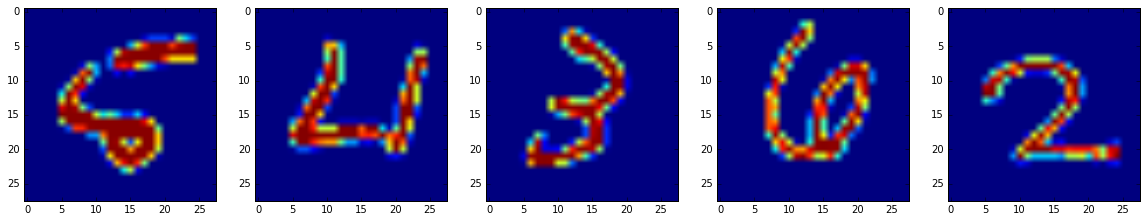

In [16]:
batch_x, batch_y = mnist.test.next_batch(10000)
prediction = sess.run(tf.argmax(u, 1), feed_dict={x:batch_x})
ground_truth = sess.run(tf.argmax(y, 1), feed_dict={y:batch_y})

print prediction
print ground_truth

sum = 0
diff_index_list = []
for i in range(10000):
    if (prediction[i] == ground_truth[i]):
        sum = sum + 1
    else:
        diff_index_list.append(i)
        #print "%d - %d: %s" % (diff_a[i], diff_b[i], diff_a[i] == diff_b[i])

print sum / 10000.0
print len(diff_index_list)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    j = diff_index_list[i]
    print "Error Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j])
    img = np.array(mnist.test.images[j])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

In [17]:
prediction_and_ground_truth = tf.equal(tf.argmax(u, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

In [18]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

0.9116


## 6. Single Layer Neural Network - All in one

In [24]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Parameters
training_epochs = 40
learning_rate = 0.001
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Construct model
W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))
u = tf.matmul(x, W) + b

# Define loss and target loss function
#z = tf.nn.softmax(u)
#error = tf.reduce_mean(-tf.reduce_sum(z_ * tf.log(z), reduction_indices=[1]))
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(u, y))
total_loss = tf.train.GradientDescentOptimizer(0.5).minimize(error)

# Initializing the variables
init = tf.initialize_all_variables()

# Calculate accuracy with a Test model
prediction_ground_truth = tf.equal(tf.argmax(u, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_ground_truth, tf.float32))
    
# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples / batch_size)
    print "Total batch: %d" % total_batch
    
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(total_loss, feed_dict={x: batch_images, y: batch_labels})
        print "Epoch %d Finished - Accuracy: %f" % (epoch, accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    print("Optimization Finished!")

Total batch: 550
Epoch 0 Finished - Accuracy: 0.912200
Epoch 1 Finished - Accuracy: 0.917600
Epoch 2 Finished - Accuracy: 0.919600
Epoch 3 Finished - Accuracy: 0.922700
Epoch 4 Finished - Accuracy: 0.922400
Epoch 5 Finished - Accuracy: 0.923200
Epoch 6 Finished - Accuracy: 0.921100
Epoch 7 Finished - Accuracy: 0.921700
Epoch 8 Finished - Accuracy: 0.922900
Epoch 9 Finished - Accuracy: 0.921200
Epoch 10 Finished - Accuracy: 0.926000
Epoch 11 Finished - Accuracy: 0.923100
Epoch 12 Finished - Accuracy: 0.926600
Epoch 13 Finished - Accuracy: 0.925500
Epoch 14 Finished - Accuracy: 0.922900
Epoch 15 Finished - Accuracy: 0.922300
Epoch 16 Finished - Accuracy: 0.916700
Epoch 17 Finished - Accuracy: 0.923100
Epoch 18 Finished - Accuracy: 0.924400
Epoch 19 Finished - Accuracy: 0.925600
Epoch 20 Finished - Accuracy: 0.925500
Epoch 21 Finished - Accuracy: 0.924500
Epoch 22 Finished - Accuracy: 0.922600
Epoch 23 Finished - Accuracy: 0.925100
Epoch 24 Finished - Accuracy: 0.924500
Epoch 25 Finished 

## 7. Multi Layer Neural Network - All in one

In [25]:
# Parameters
training_epochs = 40
learning_rate = 0.001
batch_size = 100
display_step = 1

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    u_2 = tf.add(tf.matmul(x, weights['W1']), biases['b1'])
    z_2 = tf.nn.relu(u_2)
    # Hidden layer with RELU activation
    u_3 = tf.add(tf.matmul(z_2, weights['W2']), biases['b2'])
    z_3 = tf.nn.relu(u_3)
    # Output layer with linear activation
    u_4 = tf.add(tf.matmul(z_3, weights['out']), biases['out'])
    return u_4

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and target loss function
# pred = tf.nn.softmax(pred)
# error = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
total_loss = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Initializing the variables
init = tf.initialize_all_variables()

# Calculate accuracy with a Test model    
prediction_ground_truth = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_ground_truth, tf.float32))
    
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    print "Total batch: %d" % total_batch

    # Training cycle
    for epoch in range(training_epochs):
            
        # Loop over all batches
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(total_loss, feed_dict={x: batch_images, y: batch_labels})
        print "Epoch %d Finished - Accuracy: %f" % (epoch, accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    print("Optimization Finished!")

Total batch: 550
Epoch 0 Finished - Accuracy: 0.822300
Epoch 1 Finished - Accuracy: 0.855200
Epoch 2 Finished - Accuracy: 0.870800
Epoch 3 Finished - Accuracy: 0.881200
Epoch 4 Finished - Accuracy: 0.887600
Epoch 5 Finished - Accuracy: 0.892100
Epoch 6 Finished - Accuracy: 0.898000
Epoch 7 Finished - Accuracy: 0.901100
Epoch 8 Finished - Accuracy: 0.905600
Epoch 9 Finished - Accuracy: 0.908900
Epoch 10 Finished - Accuracy: 0.910900
Epoch 11 Finished - Accuracy: 0.910400
Epoch 12 Finished - Accuracy: 0.912600
Epoch 13 Finished - Accuracy: 0.914200
Epoch 14 Finished - Accuracy: 0.914200
Epoch 15 Finished - Accuracy: 0.916800
Epoch 16 Finished - Accuracy: 0.917300
Epoch 17 Finished - Accuracy: 0.918700
Epoch 18 Finished - Accuracy: 0.917500
Epoch 19 Finished - Accuracy: 0.919200
Epoch 20 Finished - Accuracy: 0.920600
Epoch 21 Finished - Accuracy: 0.921000
Epoch 22 Finished - Accuracy: 0.919700
Epoch 23 Finished - Accuracy: 0.921100
Epoch 24 Finished - Accuracy: 0.922400
Epoch 25 Finished 